<a href="https://colab.research.google.com/github/Rajeshprd/Black-Friday/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing the dataset**

In [3]:
black_friday = pd.read_csv("/content/black friday.csv")

#**Description of dataset**

In [4]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1.0,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0.0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1.0,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1.0,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0.0,4.0,5.0,12.0


In [5]:
black_friday.shape 

(127598, 11)

In [6]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [7]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127598 entries, 0 to 127597
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     127598 non-null  int64  
 1   Product_ID                  127598 non-null  object 
 2   Gender                      127598 non-null  object 
 3   Age                         127598 non-null  object 
 4   Occupation                  127598 non-null  int64  
 5   City_Category               127597 non-null  object 
 6   Stay_In_Current_City_Years  127597 non-null  object 
 7   Marital_Status              127597 non-null  float64
 8   Product_Category_1          127597 non-null  float64
 9   Product_Category_2          88131 non-null   float64
 10  Product_Category_3          38758 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 10.7+ MB


In [8]:
black_friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,1.275980e+05,127598.000000,127597.000000,127597.000000,88131.000000,38758.000000
mean,1.003012e+06,8.085487,0.411507,5.269920,9.845559,12.653233
std,1.719467e+03,6.506138,0.492109,3.733564,5.104661,4.124252
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001514e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003051e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004447e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


#**Exploratory data analysis**
##**Finding the null values of each columns**

In [9]:
black_friday.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2            39467
Product_Category_3            88840
dtype: int64

###Most of the values in column Product_Category_2 and Product_Category_3 are missing
The 'User_ID' column is of no use in describing the dataset and we dont need product category 3 column becouse 70 % data is missing, so that i am going to remove 'User_ID' and 'Product_Category_3' column.

In [10]:
black_friday.drop('Product_Category_3',axis = 1, inplace = True)

###**Histogram of features in the dataset**

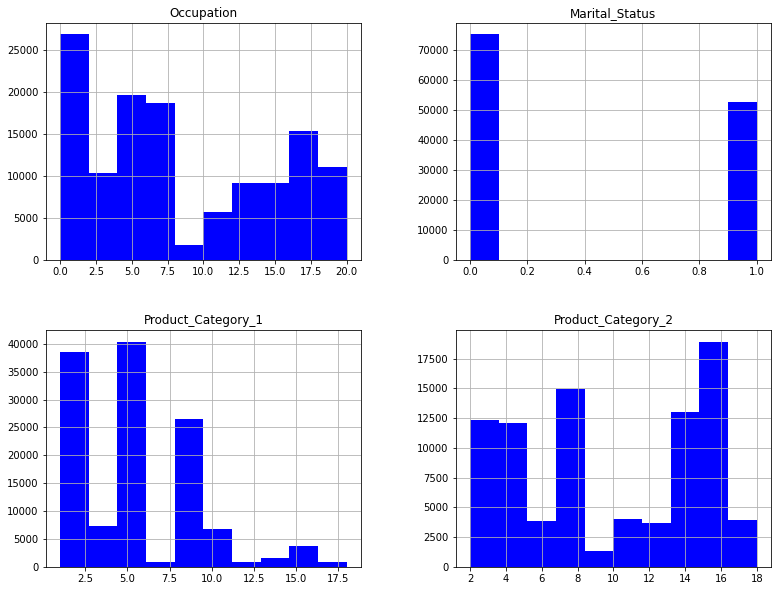

In [13]:
black_friday.drop('User_ID',axis=1).hist(figsize = (13,10), color = 'blue')
plt.show()

## **Correlation matrix of features in the dataset**

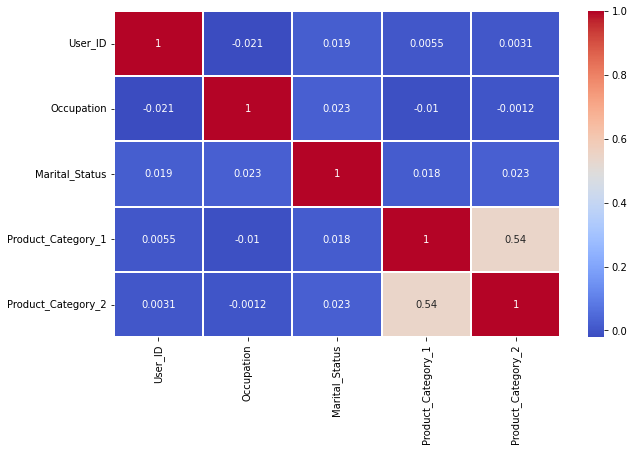

In [12]:
plt.figure(figsize=(10,6))

sns.heatmap(black_friday.corr(), annot = True, cmap='coolwarm',linewidths=1)

plt.show()

##**filling null value**

In [14]:
black_friday.Product_Category_2.fillna(0, inplace = True)

In [16]:
black_friday.Product_Category_2.isnull().sum() # No null values

0

##**check unique values**

In [17]:
black_friday.Gender.unique()

array(['M', 'F'], dtype=object)

In [18]:
black_friday.Gender.value_counts()

M    95970
F    31628
Name: Gender, dtype: int64

In [19]:
black_friday.Age.value_counts()

26-35    50834
36-45    25590
18-25    23164
46-50    10677
51-55     9001
55+       4903
0-17      3429
Name: Age, dtype: int64

In [20]:
black_friday.Age.duplicated().sum()

127591

In [21]:
black_friday.Age.unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [22]:
black_friday.Age = black_friday.Age.str.replace('0-17','26-35').replace('26-35','18-25').replace("18-25", "< 35").replace('36-50','46-50').replace('46-50','51-55').replace('51-55','55+').replace('55+','>35')

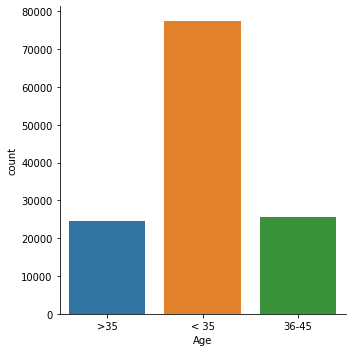

In [23]:
sns.catplot( data = black_friday, x ='Age', kind = 'count')

In [24]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127598 entries, 0 to 127597
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     127598 non-null  int64  
 1   Product_ID                  127598 non-null  object 
 2   Gender                      127598 non-null  object 
 3   Age                         127598 non-null  object 
 4   Occupation                  127598 non-null  int64  
 5   City_Category               127597 non-null  object 
 6   Stay_In_Current_City_Years  127597 non-null  object 
 7   Marital_Status              127597 non-null  float64
 8   Product_Category_1          127597 non-null  float64
 9   Product_Category_2          127598 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 9.7+ MB


###column occupation is descrete data

In [25]:
black_friday.City_Category.unique()

array(['B', 'C', 'A', nan], dtype=object)

In [26]:
black_friday.City_Category.value_counts()

B    53797
C    39700
A    34100
Name: City_Category, dtype: int64

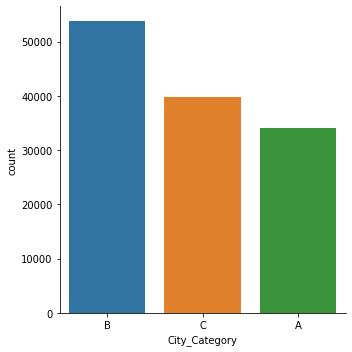

In [27]:
sns.catplot(data = black_friday, x = 'City_Category', kind = 'count')

In [28]:
black_friday.Stay_In_Current_City_Years.unique()

array(['2', '0', '4+', '1', '3', nan], dtype=object)

In [29]:
black_friday.Stay_In_Current_City_Years.value_counts()

1     45118
2     23887
3     21849
4+    19700
0     17043
Name: Stay_In_Current_City_Years, dtype: int64

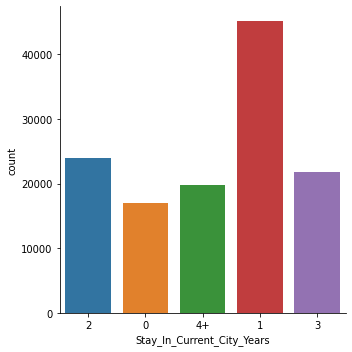

In [30]:
sns.catplot(data = black_friday, x = 'Stay_In_Current_City_Years', kind = 'count')

##**marital status- descrete data**

In [31]:
black_friday.Marital_Status.nunique()

2

In [32]:
black_friday.Marital_Status.value_counts()

0.0    75090
1.0    52507
Name: Marital_Status, dtype: int64

<Figure size 720x432 with 0 Axes>

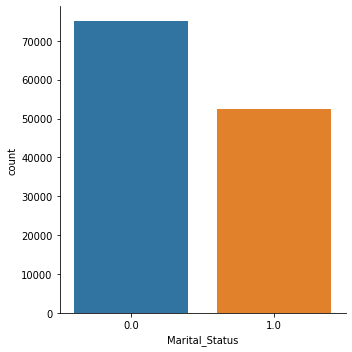

<Figure size 720x432 with 0 Axes>

In [33]:
sns.catplot(data = black_friday, x = 'Marital_Status', kind = 'count')

plt.figure(figsize=(10,6))

##**column product category 1**

In [34]:
black_friday.Product_Category_1.isnull().sum()

1

In [35]:
black_friday.Product_Category_1.value_counts()

5.0     35592
1.0     33027
8.0     26381
2.0      5595
11.0     5554
6.0      4802
3.0      4630
4.0      2720
16.0     2231
15.0     1465
13.0     1271
10.0     1228
7.0       898
12.0      897
18.0      709
14.0      370
17.0      127
9.0       100
Name: Product_Category_1, dtype: int64

In [36]:
black_friday.Product_Category_1.nunique()

18